<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
critical_cols = ['Employment','JobSat', 'RemoteWork', 'YearsCodePro']
missing_summary = df[critical_cols].isnull().sum()
missing_percentage = missing_summary/len(df)*100

print("Missing Values Summary: ")
for col in critical_cols:
    print(f"{col}: {missing_summary[col]} missing ({missing_percentage[col]: .2f}%)")
    print(f"\n{col} value distribution:")
    print(df[col].value_counts(normalize=True)*100)

print("\nPattern analysis - missing values correlation:")
print(df[critical_cols].isnull().corr())

if df['Employment'].isnull().sum()>0:
    df['Employment'] = df['Employment'].fillna(df['Employment'].mode()[0])
    print("Filled Employment missing values with most frequent category")

if df['JobSat'].isnull().sum()>0:
    df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])
    print("Filled JobSat missing values with most frequent category")

if df['RemoteWork'].isnull().sum()>0:
    df['RemoteWork'] = df['RemoteWork'].fillna('Not Remote')
    print("Filled RemoteWork missing values with 'Not Remote'")

def fill_experience(row):
    if pd.isna(row['YearsCodePro']):
        if row['Employment'] == 'Student':
            return 'Less than 1 year'
        elif row['Employment'] == 'Senior executive/Owner':
            return '20+ years'
        else:
            return df['YearsCodePro'].mode()[0]
    return row['YearsCodePro']

df['YearsCodePro'] = df.apply(fill_experience, axis=1)

Missing Values Summary: 
Employment: 0 missing ( 0.00%)

Employment value distribution:
Employment
Employed, full-time                                                                                                                                  59.661965
Independent contractor, freelancer, or self-employed                                                                                                  7.405596
Student, full-time                                                                                                                                    7.196235
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              5.435763
Not employed, but looking for work                                                                                                                    3.577487
                                                                                                          

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


 Median Value for 0-5: 2.0
 Median Value for 5-10: 8.0
 Median Value for 10-20: 15.0
 Median Value for >20: 25.0


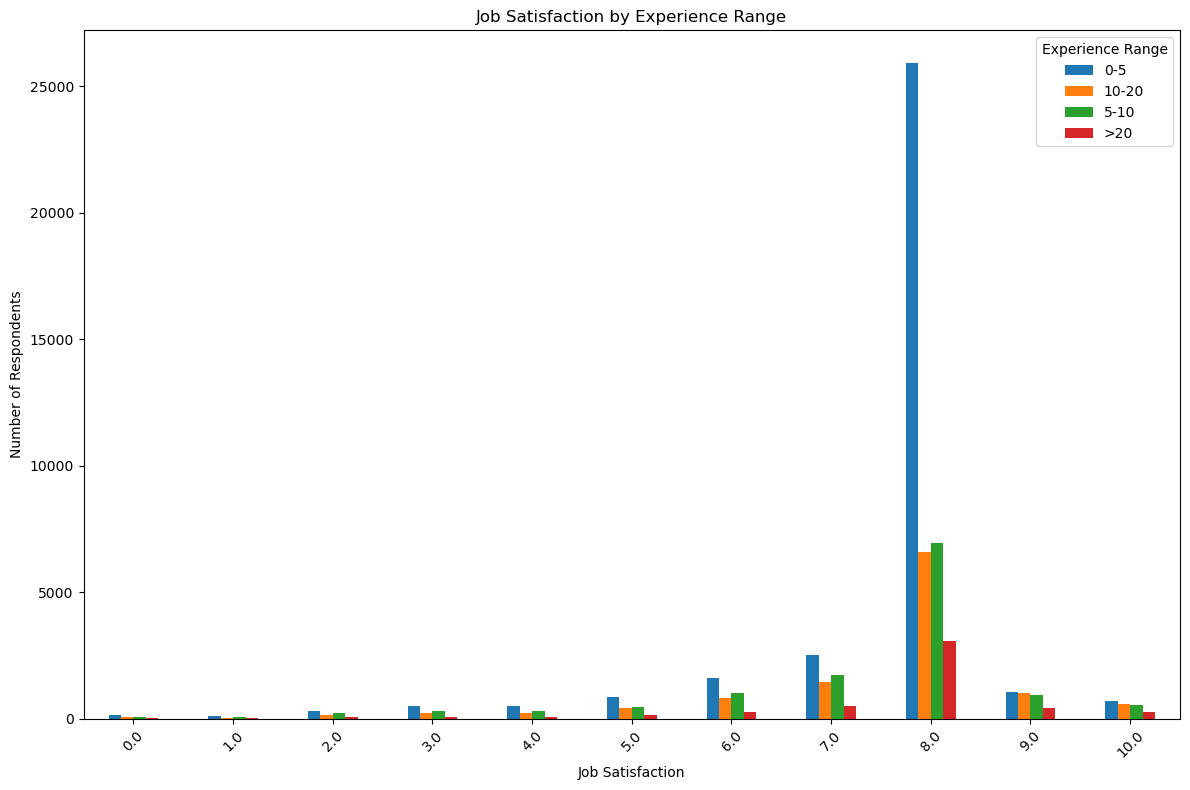

In [4]:
import numpy as np
exp_ranges = {
    "0-5": [],
    "5-10": [],
    "10-20": [],
    ">20": []
}

for exp in df['YearsCodePro'].values:
    if pd.isna(exp):
        continue
    
    exp_str = str(exp)
    
    if exp_str == 'Less than 1 year':
        exp_ranges["0-5"].append(exp)
    elif exp_str in ['0', '1', '2', '3', '4', '5']:
        exp_ranges["0-5"].append(exp)
    elif exp_str in ['6', '7', '8', '9', '10']:
        exp_ranges["5-10"].append(exp)
    elif exp_str in ['11', '12', '13', '14', '15', '16', '17', '18', '19', '20']:
        exp_ranges["10-20"].append(exp)
    elif exp_str in ['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '30+', 'More than 30']:
        exp_ranges[">20"].append(exp)

for range_name, values in exp_ranges.items():
    if values:
        numeric_values = []
        for val in values:
            if str(val).isdigit():
                numeric_values.append(int(val))
            elif 'less than 1' in str(val).lower():
                numeric_values.append(0.5)
            elif 'more than 50' in str(val).lower():
                numeric_values.append(65)

        if numeric_values:
            median_val = np.median(numeric_values)
            print(f" Median Value for {range_name}: {median_val}")
        else:
            print(f"Median Value for {range_name}: No numeric values")

plot_data = []
for range_name, values in exp_ranges.items():
    range_df = df[df['YearsCodePro'].isin(values)]
    job_sat_counts = range_df['JobSat'].value_counts()
    
    for job_sat, count in job_sat_counts.items():
        plot_data.append({
            'ExperienceRange': range_name,
            'JobSatisfaction': job_sat,
            'Count': count
        })

plot_df = pd.DataFrame(plot_data)
pivot_df = plot_df.pivot(index='JobSatisfaction', columns='ExperienceRange', values='Count')

pivot_df.plot(kind='bar', figsize=(12, 8))
plt.title('Job Satisfaction by Experience Range')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.legend(title='Experience Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


<Axes: xlabel='JobSat', ylabel='count'>

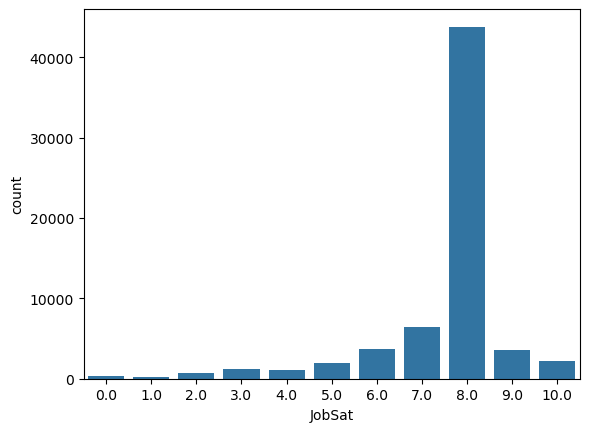

In [5]:
## Write your code here

sns.countplot(data = df, x='JobSat')

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


RemoteWork,"Hybrid (some remote, some in-person)",In-person,Not Remote,Remote,Total
Employment,,,,,
"Employed, full-time",17281,8552,15,13193,39041
"Employed, full-time;Employed, part-time",85,32,0,95,212
"Employed, full-time;Independent contractor, freelancer, or self-employed",1330,366,0,1861,3557
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",80,17,0,87,184
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,1,0,0,1
...,...,...,...,...,...
"Student, full-time;Student, part-time;Retired",0,0,2,0,2
"Student, part-time",0,0,494,0,494
"Student, part-time;Employed, part-time",282,179,0,97,558


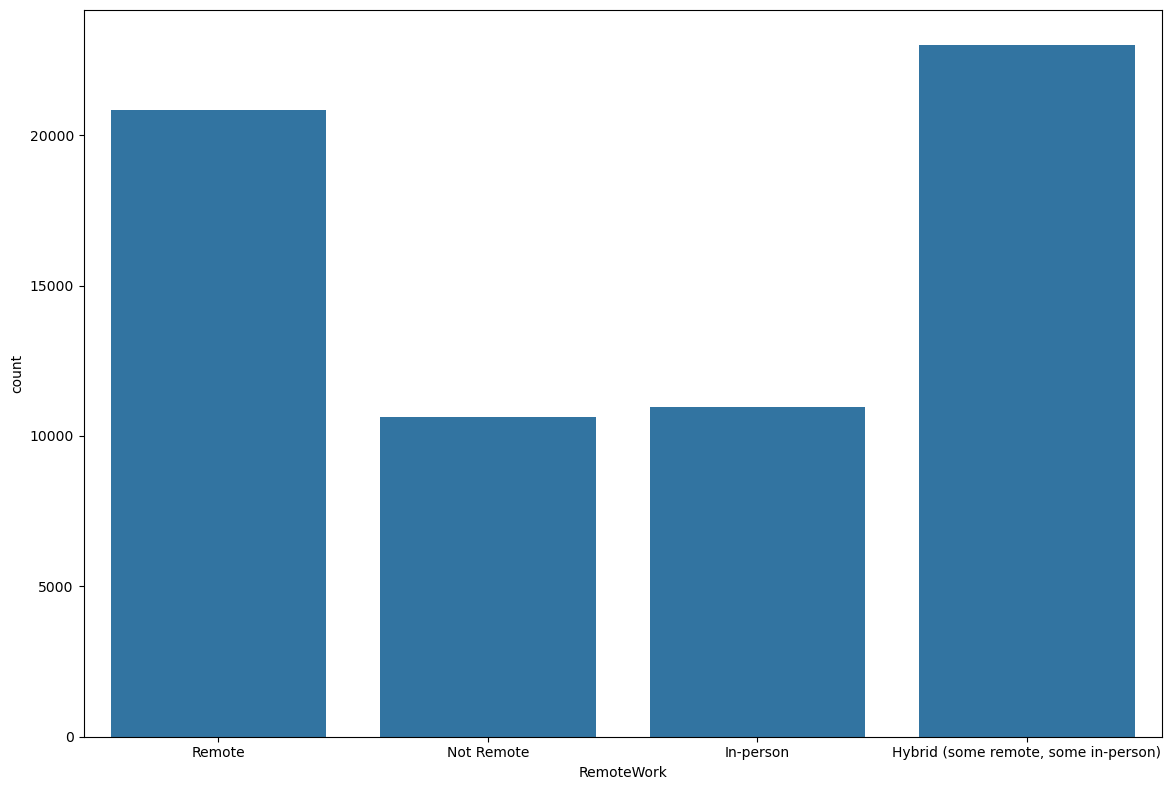

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x='RemoteWork')

employment_remote = pd.crosstab(
    df['Employment'], 
    df['RemoteWork'],
    margins=True,
    margins_name="Total"
)
plt.tight_layout()
employment_remote

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [7]:
!pip install getContinent
from getconti import getConti



In [8]:
def add_continent_column(df):
    continent_getter = getConti()
    
    # Manual mapping for the 32 countries that getConti() doesn't recognize
    country_continent_map = {
        'United States of America': 'North America',
        'United Kingdom of Great Britain and Northern Ireland': 'Europe',
        'Iran, Islamic Republic of...': 'Asia',
        'Viet Nam': 'Asia',
        'Taiwan': 'Asia',
        'Hong Kong (S.A.R.)': 'Asia',
        'South Korea': 'Asia',
        'Venezuela, Bolivarian Republic of...': 'South America',
        'Bosnia and Herzegovina': 'Europe',
        'Republic of Korea': 'Asia',
        'Nomadic': None,  # Could be multiple continents, set to None or specify
        'Republic of Moldova': 'Europe',
        'Republic of North Macedonia': 'Europe',
        'Syrian Arab Republic': 'Asia',
        'United Republic of Tanzania': 'Africa',
        'Myanmar': 'Asia',
        'Kosovo': 'Europe',
        'Palestine': 'Asia',
        'Côte d\'Ivoire': 'Africa',
        'Isle of Man': 'Europe',
        'Trinidad and Tobago': 'North America',
        'Congo, Republic of the...': 'Africa',
        'Antigua and Barbuda': 'North America',
        'Libyan Arab Jamahiriya': 'Africa',
        'Lao People\'s Democratic Republic': 'Asia',
        'Burkina Faso': 'Africa',
        'Brunei Darussalam': 'Asia',
        'Democratic Republic of the Congo': 'Africa',
        'North Korea': 'Asia',
        'Democratic People\'s Republic of Korea': 'Asia',
        'Saint Kitts and Nevis': 'North America',
        'Micronesia, Federated States of...': 'Oceania'
    }
    
    def get_continent(country):
        if pd.isna(country):
            return None
        
        # First, check if country is in our manual mapping
        if country in country_continent_map:
            return country_continent_map[country]
        
        # If not in manual mapping, try getConti()
        try:
            return continent_getter.getContinents(country)
        except Exception as e:
            print(f"WARNING: Could not find continent for country '{country}'. Error: {e}")
            return 'Unknown'
    
    df['Continent'] = df['Country'].apply(get_continent)
    
    # Verify the fix
    unknown_count = (df['Continent'] == 'Unknown').sum()
    print(f"Remaining unknown continents after manual mapping: {unknown_count}")
    
    return df

# Apply the updated function
df = add_continent_column(df)

c:\Users\karlk\anaconda3\Lib\site-packages\getconti
Remaining unknown continents after manual mapping: 0


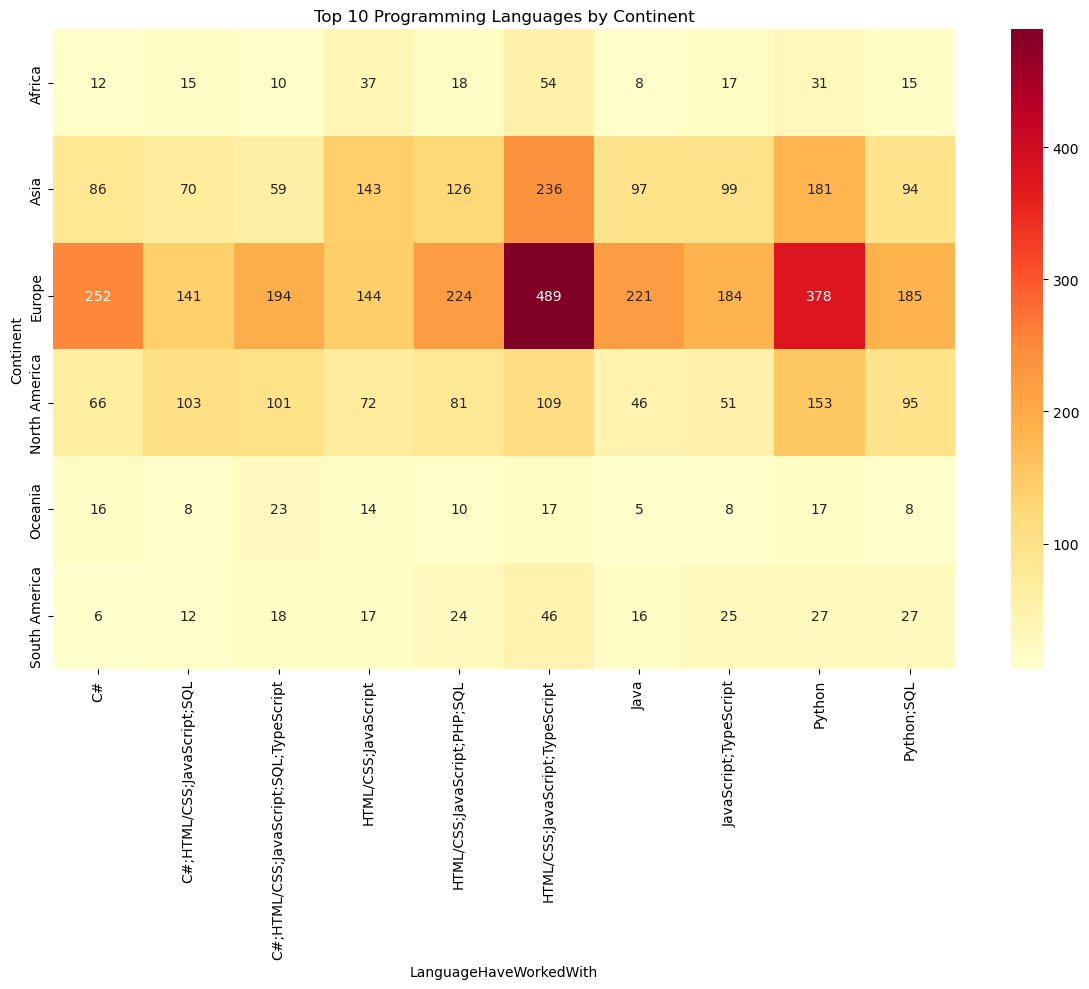

In [9]:

top_languages = df['LanguageHaveWorkedWith'].value_counts().head(10).index

filtered_df = df[df['LanguageHaveWorkedWith'].isin(top_languages)]

cross_tab = pd.crosstab(filtered_df['Continent'], filtered_df['LanguageHaveWorkedWith'])
plt.figure(figsize=(12, 10))
sns.heatmap(cross_tab, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Top 10 Programming Languages by Continent')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [10]:
def convert_years(value):
    if value == 'Less than 1 year':
        return 0.5
    elif value == 'More than 50 years':
        return 65
    else:
        try:
            return float(value)
        except (ValueError, TypeError):
            return 'Unknown'

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)

The correlation coefficient between the years of experience and job satisfaction is -0.0313
As visible below, there is no correlation between the two variables


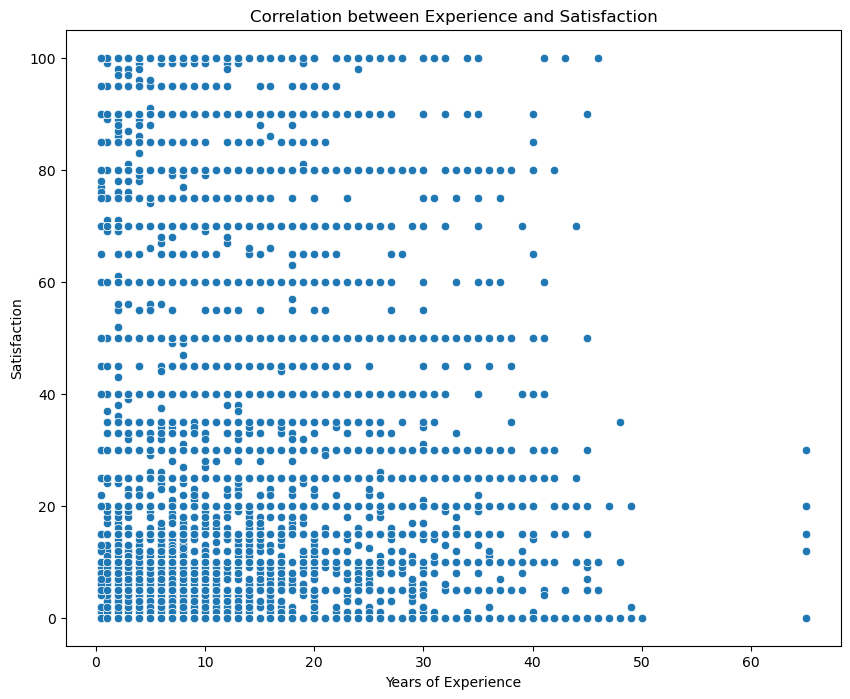

In [11]:
correlation = df[['YearsCodePro', 'JobSatPoints_1']].corr()

print(f"The correlation coefficient between the years of experience and job satisfaction is {correlation.iloc[0,1]:,.4f}")
print("As visible below, there is no correlation between the two variables")
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x=df['YearsCodePro'], y=df['JobSatPoints_1'])
plt.title("Correlation between Experience and Satisfaction")
plt.xlabel("Years of Experience")
plt.ylabel("Satisfaction")
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [12]:
top_10_edlevels = df['EdLevel'].value_counts().head(10).index
top_10_employment = df['Employment'].value_counts().head(10).index

df_top_both = df[df['EdLevel'].isin(top_10_edlevels) & df['Employment'].isin(top_10_employment)]

cross_tab_both = pd.crosstab(df_top_both['EdLevel'], df_top_both['Employment'], margins=True)

cross_tab_norm_rows = pd.crosstab(df_top_both['EdLevel'], df_top_both['Employment'], normalize='index') * 100

cross_tab_norm_cols = pd.crosstab(df_top_both['EdLevel'], df_top_both['Employment'], normalize='columns') * 100


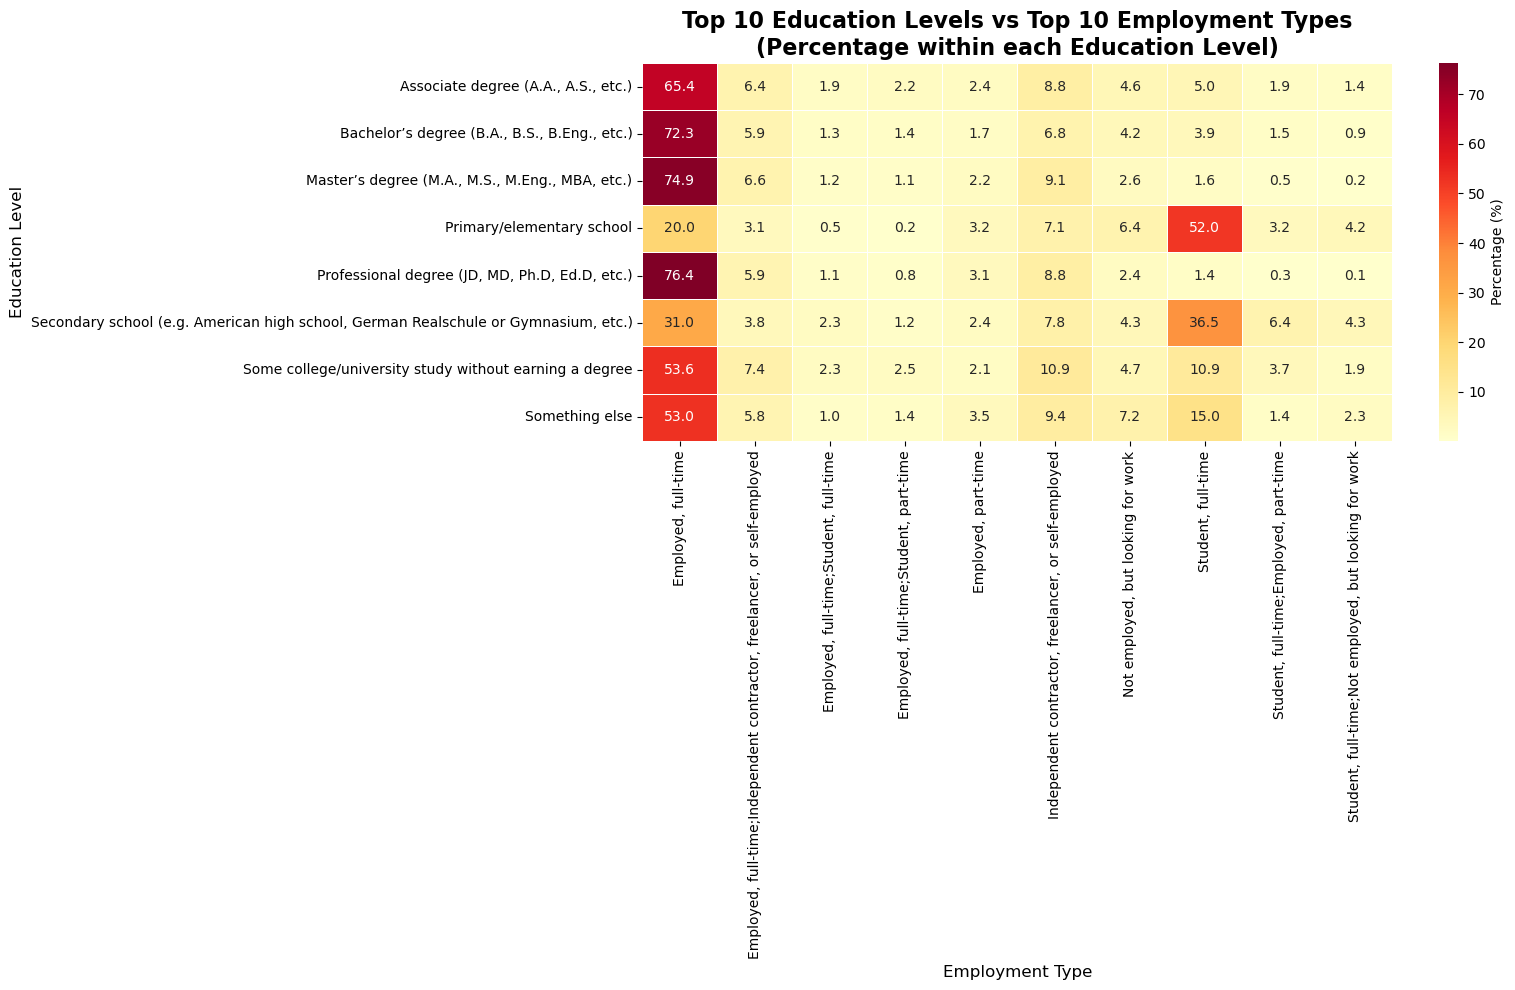

In [13]:
plt.figure(figsize=(16, 10))
sns.heatmap(cross_tab_norm_rows, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage (%)'},
            linewidths=0.5)
plt.title('Top 10 Education Levels vs Top 10 Employment Types\n(Percentage within each Education Level)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [14]:
df.to_excel('EDA_survey_data.xlsx', index=False)

with pd.ExcelWriter('EDA_survey_data.xlsx') as writer:
    df.to_excel(writer, sheet_name='Cleaned_Data', index=False)
    df.describe().to_excel(writer, sheet_name='Summary_Stats')

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
